In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import seaborn as sns
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix,
    classification_report
)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [6]:
data2= pd.read_csv('lung_cancer_final.csv', encoding='utf-8', usecols=['AGE','SMOKING','ANXIETY', 'SHORTNESS OF BREATH',
                                                                     'CHEST PAIN', 'LUNG_CANCER'])
data2.head()

,AGE,SMOKING,ANXIETY,SHORTNESS OF BREATH,CHEST PAIN,LUNG_CANCER
0,69,1,2,2,2,YES
1,74,2,1,2,2,YES
2,59,1,1,2,2,NO
3,63,2,2,1,2,NO
4,63,1,1,2,1,NO


In [12]:
le = LabelEncoder()
le.fit(data2['LUNG_CANCER'])
data2['LUNG_CANCER'] = le.transform(data2['LUNG_CANCER'])
# le.fit(): Học tất cả các giá trị phân loại duy nhất trong cột HeartDisease.
#le.transform(): Chuyển đổi các giá trị trong cột HeartDisease thành các số nguyên.

In [13]:
X = data2.loc[:,'AGE':'CHEST PAIN']
y = data2.loc[:,'LUNG_CANCER']
# Split by percent and store data in lists
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf = RandomForestClassifier(n_estimators=100,oob_score=True, random_state=25)
rf.fit(X_train, y_train) # Train the Random Forest model

RandomForestClassifier(oob_score=True, random_state=25)

In [15]:
# Make predictions and evaluate
y_pred = rf.predict(X_test) # Predicts the class labels for the test dataset X_test.
y_prob = rf.predict_proba(X_test)[:, 1]  # Predicts the probability of the positive class
                                        # (class 1) for each sample in X_test

In [16]:
acc = accuracy_score(y_test, y_pred)  # Proportion of correct predictions out of total predictions.
print("Accuracy:", acc)

Accuracy: 0.631578947368421


In [17]:
prec = precision_score(y_test, y_pred) # Proportion of correctly predicted positive samples out of all predicted positives.
print("Precision:", prec)

Precision: 0.7222222222222222


In [18]:
rec = recall_score(y_test, y_pred) # Proportion of actual positive samples correctly identified as positive.
print("Recall:", rec)

Recall: 0.5909090909090909


In [19]:
f1 = f1_score(y_test, y_pred) # Harmonic mean of precision and recall.
print("F1 Score:", f1)

F1 Score: 0.65


In [20]:
roc_auc = roc_auc_score(y_test, y_prob) # Measures the model's ability to distinguish between classes
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.7485795454545454


In [21]:
cm = confusion_matrix(y_test, y_pred) # Provides a matrix summarizing the prediction results:
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[11  5]
 [ 9 13]]


In [22]:
report = classification_report(y_test, y_pred) # Generates a detailed text summary of precision, recall, F1-score, and support for each class.
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.69      0.61        16
           1       0.72      0.59      0.65        22

    accuracy                           0.63        38
   macro avg       0.64      0.64      0.63        38
weighted avg       0.65      0.63      0.63        38



In [24]:
data2.columns

Index(['AGE', 'SMOKING', 'ANXIETY', 'SHORTNESS OF BREATH', 'CHEST PAIN',
       'LUNG_CANCER'],
      dtype='object')

In [25]:
feature_names = ['AGE', 'SMOKING', 'ANXIETY', 'SHORTNESS OF BREATH', 'CHEST PAIN', 'LUNG_CANCER']
target_names = ['NO', 'YES']

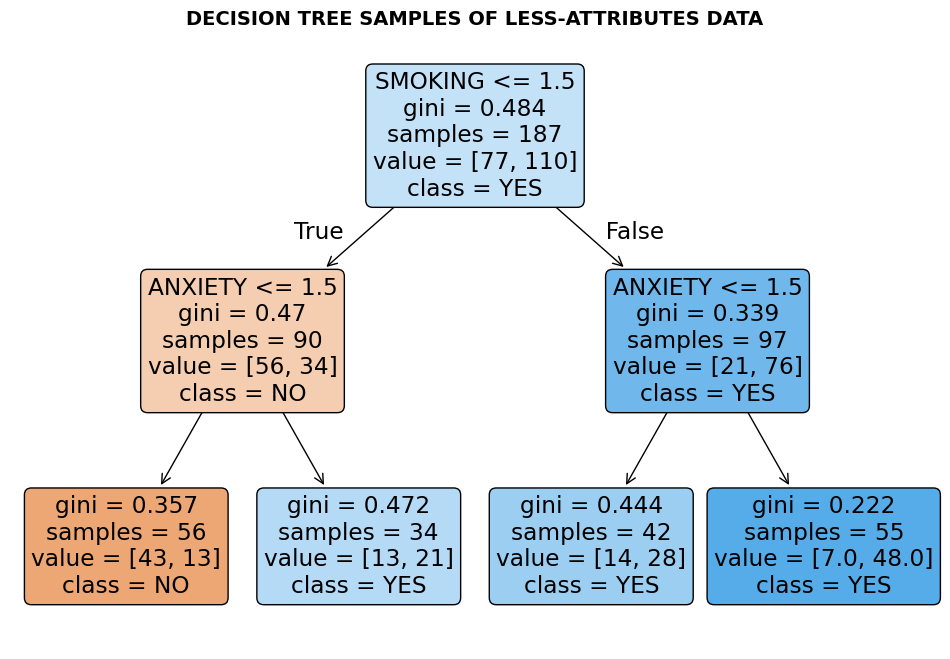

In [65]:
# Create a decision tree classifier
clf = DecisionTreeClassifier(max_depth=2)
clf = clf.fit(X, y)

# Visualize the decision tree
plt.figure(figsize=(12,8))
tree.plot_tree(clf, filled=True, rounded=True, feature_names=feature_names, class_names=target_names)
plt.title('DECISION TREE SAMPLES OF LESS-ATTRIBUTES DATA', fontsize=14, fontweight='bold')
plt.show()

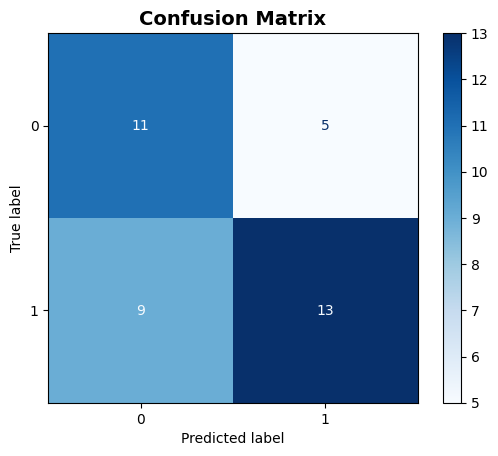

In [27]:
# Assuming `y_test` are true labels and `y_pred` are predictions
cm = confusion_matrix(y_test, y_pred, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix", fontsize=14, fontweight='bold')
plt.show()


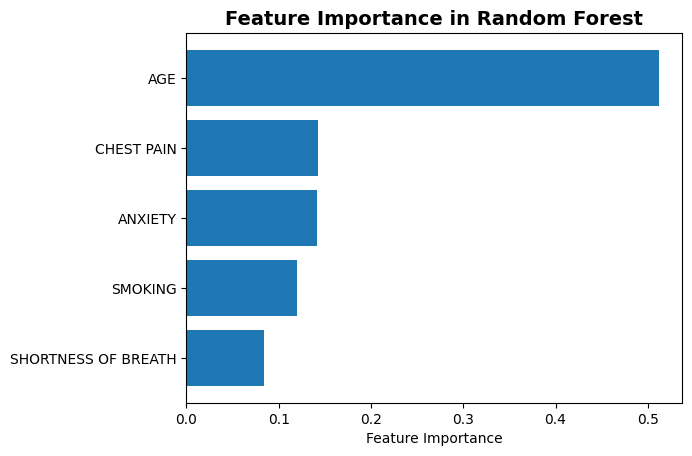

In [28]:

feature_importances = rf.feature_importances_

sorted_idx = feature_importances.argsort()

plt.barh(range(len(feature_importances)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(feature_importances)), pd.Series(feature_names).iloc[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Random Forest', fontsize=14, fontweight='bold')
plt.show()


In [30]:
def rgb_to_heximal(r, g, b):
    return np.array([r, g, b]) / 255

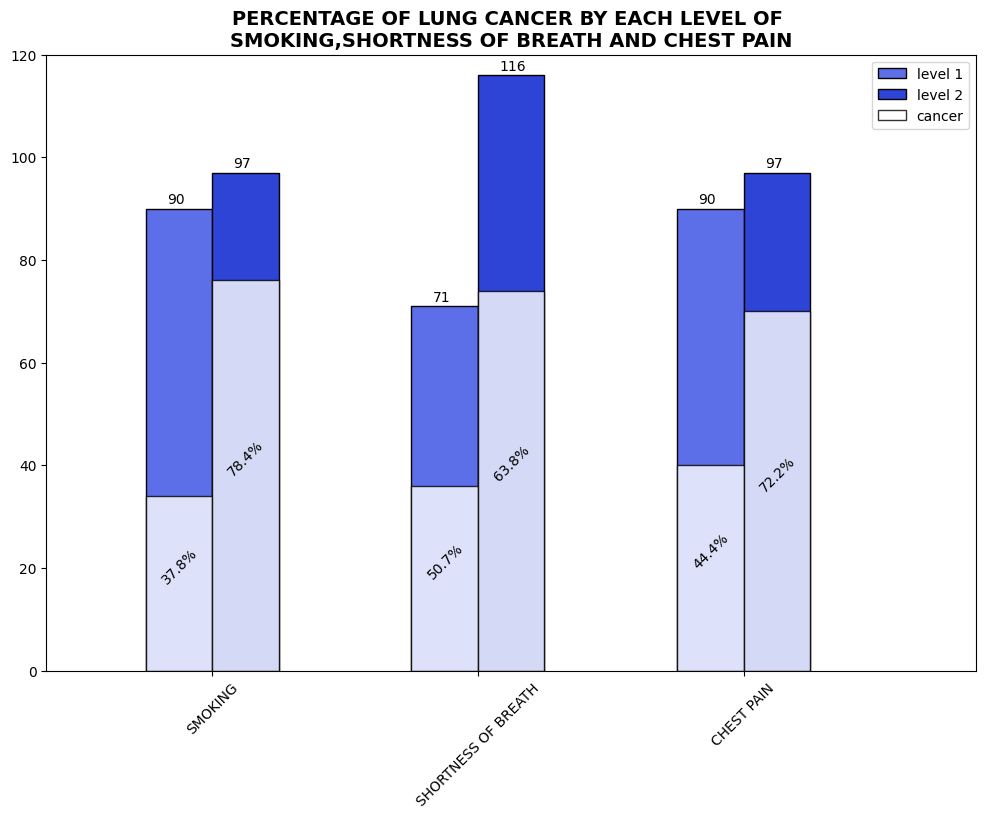

In [64]:
labels = ['SMOKING', 'SHORTNESS OF BREATH', 'CHEST PAIN']
width = 0.25
index = np.arange(len(labels))

total1 = data2[labels[0]].value_counts().sort_index()
cancer1 = data2[data2['LUNG_CANCER']==1].groupby(labels[0])['LUNG_CANCER'].count()
pct1 = cancer1/total1

total2 = data2[labels[1]].value_counts().sort_index()
cancer2 = data2[data2['LUNG_CANCER']==1].groupby(labels[1])['LUNG_CANCER'].count()
pct2 = cancer2/total2

total3 = data2[labels[2]].value_counts().sort_index()
cancer3 = data2[data2['LUNG_CANCER']==1].groupby(labels[2])['LUNG_CANCER'].count()
pct3 = cancer3/total3



kind1_tol = list(map(lambda x : x[1], [total1, total2, total3]))
kind1_can = list(map(lambda x : x[1], [cancer1, cancer2, cancer3]))
kind2_tol = list(map(lambda x : x[2], [total1, total2, total3]))
kind2_can = list(map(lambda x : x[2], [cancer1, cancer2, cancer3]))

plt.figure(figsize=(12,8))
tol1_bars = plt.bar(index, kind1_tol, width=width,color=rgb_to_heximal(92, 111, 232), label='level 1',
        edgecolor='black')
tol2_bars = plt.bar(index+width, kind2_tol, width=width,color=rgb_to_heximal(46, 68, 214), label='level 2',
        edgecolor='black')
can1_bars = plt.bar(index, kind1_can, width=width,color=rgb_to_heximal(255, 255, 255), label='cancer',edgecolor='black',
alpha=0.8)
can2_bars = plt.bar(index+width, kind2_can, width=width,color=rgb_to_heximal(255, 255, 255),edgecolor='black',
alpha=0.8)


for i, j, text in zip(index, list(can1_bars), map(lambda x: x[1], [pct1,pct2,pct3])):
    plt.text(i-width/2+0.05, j.get_height()/2, f'{round(text*100,1)}%', rotation=45)

for i, j, text in zip(index, list(can2_bars), map(lambda x: x[2], [pct1,pct2,pct3])):
    plt.text(i+width/2+0.05, j.get_height()/2, f'{round(text*100,1)}%', rotation=45)

for i, j in zip(index, tol1_bars):
    plt.text(i-width/2+0.08, j.get_height()+1, f'{j.get_height()}')

for i, j in zip(index, tol2_bars):
    plt.text(i+width/2+0.08, j.get_height()+1, f'{j.get_height()}')


plt.title('PERCENTAGE OF LUNG CANCER BY EACH LEVEL OF \n{},{} AND {}'.format(labels[0],
            labels[1],labels[2]),
          fontsize=14, fontweight='bold')
plt.xlim(-.5, index[-1] + 1)
plt.ylim(0,120)
plt.xticks(index+width/2, labels, rotation=45)
plt.legend()
plt.show()


